In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
# Data Manip
import numpy as np
import pandas as pd

# Dataviz
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

# sklearn metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error


## 1. Chargement du dataset et preparation des données pour ML

### 1.1 Chargement du dataset

In [4]:
shp = pd.read_csv("../transformed\student_habits_performance.csv")
shp.head()

,id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [5]:
shp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1000 non-null   int64  
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

### 1.2 Data Manipulation pour les varaibles catégorielles

In [6]:
shpml = pd.get_dummies(shp)
shpml.columns

Index(['id', 'age', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'attendance_percentage', 'sleep_hours',
       'exercise_frequency', 'mental_health_rating', 'exam_score',
       'gender_Female', 'gender_Male', 'gender_Other', 'part_time_job_No',
       'part_time_job_Yes', 'diet_quality_Fair', 'diet_quality_Good',
       'diet_quality_Poor', 'parental_education_level_Bachelor',
       'parental_education_level_High School',
       'parental_education_level_Master', 'parental_education_level_Unknown',
       'internet_quality_Average', 'internet_quality_Good',
       'internet_quality_Poor', 'extracurricular_participation_No',
       'extracurricular_participation_Yes'],
      dtype='object')

In [7]:
y = shpml.exam_score
X = shpml.drop(columns = ["id", "exam_score"])
X.columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'gender_Female', 'gender_Male', 'gender_Other',
       'part_time_job_No', 'part_time_job_Yes', 'diet_quality_Fair',
       'diet_quality_Good', 'diet_quality_Poor',
       'parental_education_level_Bachelor',
       'parental_education_level_High School',
       'parental_education_level_Master', 'parental_education_level_Unknown',
       'internet_quality_Average', 'internet_quality_Good',
       'internet_quality_Poor', 'extracurricular_participation_No',
       'extracurricular_participation_Yes'],
      dtype='object')

## 2. Modèles de regression linéaire

### 2.1 Regression linéaire classique

In [8]:
reg_lin = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [39]:
reg_lin.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
y_pred = reg_lin.predict(X_test)

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("MAE:", mae, ";", "MSE:", mse, ";", "RMSE:", rmse)

MAE: 4.189311054627606 ; MSE: 26.476236454969193 ; RMSE: 5.14550643328421


In [40]:
for i in range(len(reg_lin.coef_)):

    print("Feature:", X.columns[i], ";", "coeff:", reg_lin.coef_[i])


Feature: age ; coeff: 0.052380081594701026
Feature: study_hours_per_day ; coeff: 9.531532014587434
Feature: social_media_hours ; coeff: -2.6850044855290873
Feature: netflix_hours ; coeff: -2.3215307151083535
Feature: attendance_percentage ; coeff: 0.1445076942016557
Feature: sleep_hours ; coeff: 1.9764071904681215
Feature: exercise_frequency ; coeff: 1.3196459241560452
Feature: mental_health_rating ; coeff: 1.9528562272570462
Feature: gender_Female ; coeff: -0.31500178615494856
Feature: gender_Male ; coeff: -0.18070542270967027
Feature: gender_Other ; coeff: 0.495707208864619
Feature: part_time_job_No ; coeff: -0.18546060417818414
Feature: part_time_job_Yes ; coeff: 0.1854606041781843
Feature: diet_quality_Fair ; coeff: 0.5015559802492435
Feature: diet_quality_Good ; coeff: -0.4567995977523904
Feature: diet_quality_Poor ; coeff: -0.04475638249685253
Feature: parental_education_level_Bachelor ; coeff: 0.49768560499329134
Feature: parental_education_level_High School ; coeff: 0.045154436

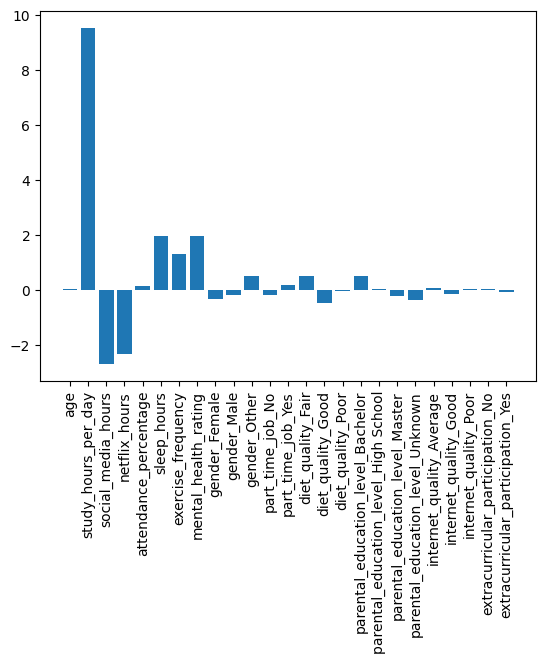

In [14]:
plt.bar(X.columns, reg_lin.coef_)
plt.xticks(rotation=90)
plt.show()

In [42]:
total_abs_coeff = sum(abs(reg_lin.coef_))
print(total_abs_coeff)

feature_coeff = []
for i in range(len(reg_lin.coef_)):
    feature_coeff.append({'feature' : X.columns[i], "coeff" : abs(reg_lin.coef_[i])/total_abs_coeff})

print(feature_coeff)

def select_coeff(x):
    return x["coeff"]
print(select_coeff(feature_coeff[1]))
print(sorted(feature_coeff, reverse=True, key=select_coeff))
feature_coeff_sorted = sorted(feature_coeff, reverse=True, key=select_coeff)



23.824337127098143
[{'feature': 'age', 'coeff': np.float64(0.002198595550225117)}, {'feature': 'study_hours_per_day', 'coeff': np.float64(0.40007543394548983)}, {'feature': 'social_media_hours', 'coeff': np.float64(0.11270007099064783)}, {'feature': 'netflix_hours', 'coeff': np.float64(0.09744366454871103)}, {'feature': 'attendance_percentage', 'coeff': np.float64(0.00606554941825813)}, {'feature': 'sleep_hours', 'coeff': np.float64(0.0829574892230738)}, {'feature': 'exercise_frequency', 'coeff': np.float64(0.05539066699383888)}, {'feature': 'mental_health_rating', 'coeff': np.float64(0.08196896378853871)}, {'feature': 'gender_Female', 'coeff': np.float64(0.013221848921733944)}, {'feature': 'gender_Male', 'coeff': np.float64(0.0075849087320097285)}, {'feature': 'gender_Other', 'coeff': np.float64(0.02080675765374368)}, {'feature': 'part_time_job_No', 'coeff': np.float64(0.007784502174763073)}, {'feature': 'part_time_job_Yes', 'coeff': np.float64(0.00778450217476308)}, {'feature': 'diet

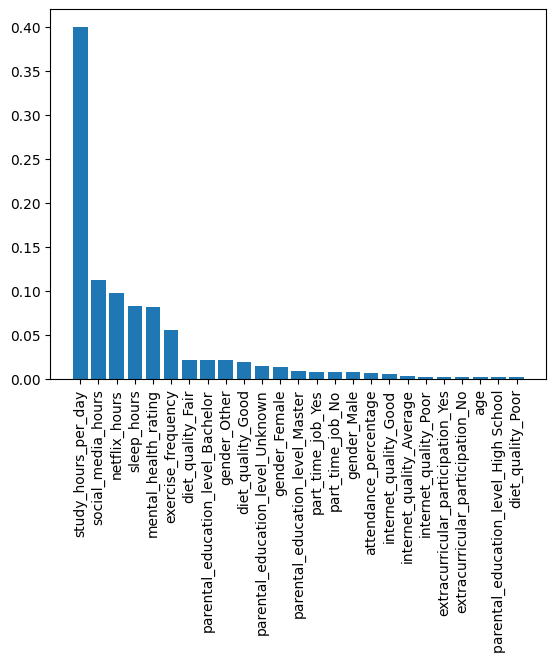

In [50]:
feature = []
coeff = []
for i in range(len(feature_coeff_sorted)):
    feature.append(feature_coeff_sorted[i]['feature'])
    coeff.append(feature_coeff_sorted[i]['coeff'])

plt.bar(feature, coeff)
plt.xticks(rotation=90)
plt.show()

### 2.2 Modèle de régeression Ridge

In [53]:
reg_ridge = Ridge()

In [54]:
reg_ridge.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [55]:
y_pred = reg_ridge.predict(X_test)

In [56]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("MAE:", mae, ";", "MSE:", mse, ";", "RMSE:", rmse)

MAE: 4.18916436642335 ; MSE: 26.477325348577303 ; RMSE: 5.145612242345638


23.77923052063994


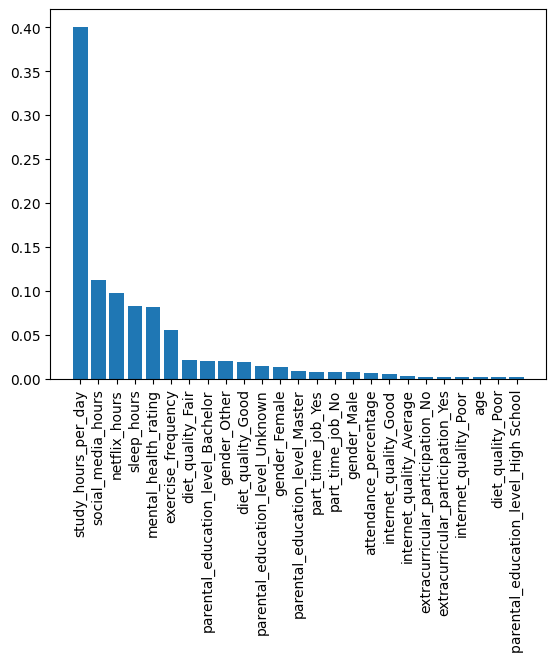

In [57]:
total_abs_coeff = sum(abs(reg_ridge.coef_))
print(total_abs_coeff)

feature_coeff = []
for i in range(len(reg_ridge.coef_)):
    feature_coeff.append({'feature' : X.columns[i], "coeff" : abs(reg_ridge.coef_[i])/total_abs_coeff})


def select_coeff(x):
    return x["coeff"]
feature_coeff_sorted = sorted(feature_coeff, reverse=True, key=select_coeff)

feature = []
coeff = []
for i in range(len(feature_coeff_sorted)):
    feature.append(feature_coeff_sorted[i]['feature'])
    coeff.append(feature_coeff_sorted[i]['coeff'])

plt.bar(feature, coeff)
plt.xticks(rotation=90)
plt.show()